In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [16]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
X = iris.data
y = iris.target
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [73]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.index = iris.target
data.reset_index(inplace=True)

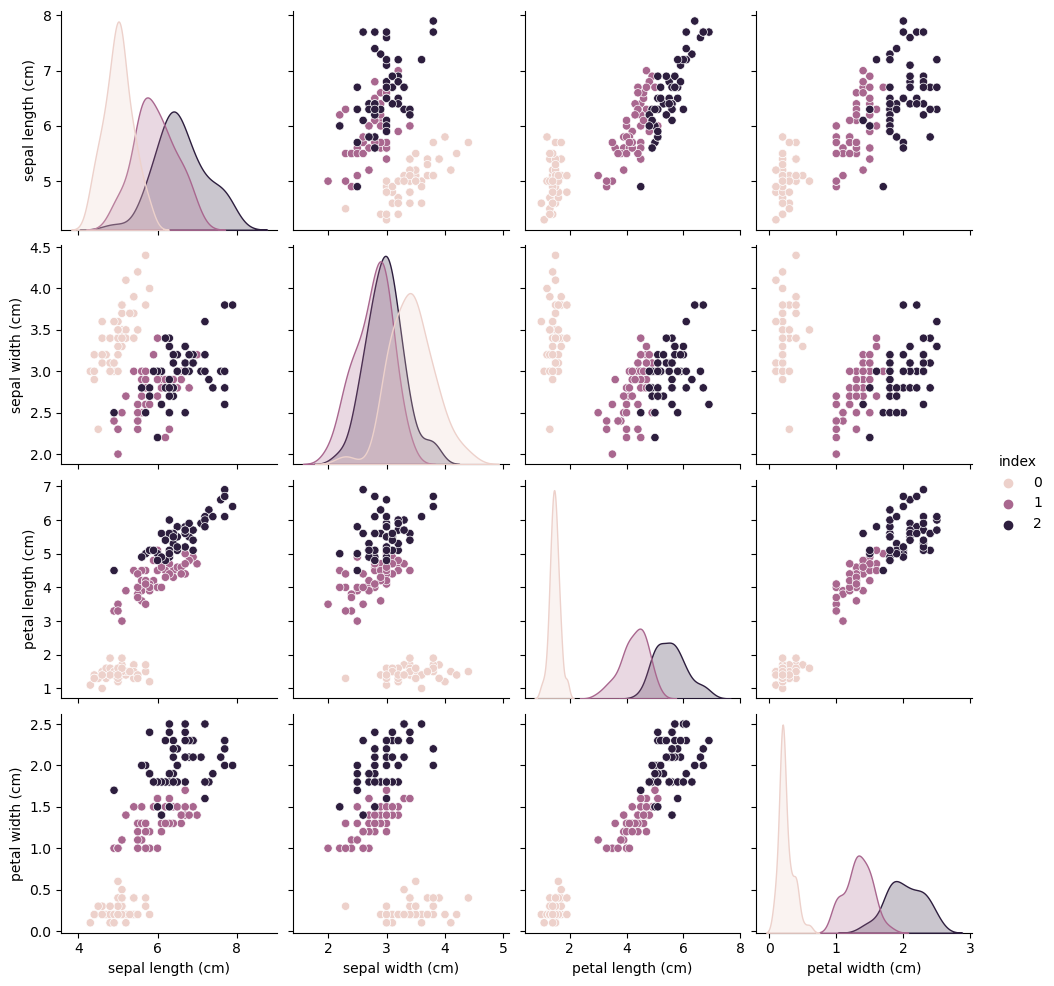

In [83]:
sns.pairplot(data, hue="index")
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [42]:
def one_hot(y):
    N = len(y)
    y = y.astype(np.int32)
    K = y.max()+1
    ind = np.zeros((N,K))
    for n in range(N):
        k = y[n]
        ind[n, k] = 1
    return ind

In [44]:
y_train_one = one_hot(y_train)

In [46]:
w = train_logistic_regression(X_train, y_train_one,500,0.1,fit_intercept=True)

0.6047886835248425
0.29576205586358595
0.17284043578004296
0.14471863313974254
0.12668184933086313


In [57]:
print('Train Accuracy: %.1f %%' % (np.mean(predict(X_test,w) == y_test) * 100))

Train Accuracy: 100.0 %
